### First of all, we started by looking at the data for an individual set of weights - all 1.
### With this, things such as the individual behaviour of chromosomes, distribution of interest score and relationship between metrics and interest score, could be visualised.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
interestingGenes = ['TMSB4X', 'SOX2', 'ID1', 'HES1', 'TMSB10', 'KRT18', 'DDIT4', 'GADD45G', 
                    'CEBPB', 'PEG10', 'ARL4D', 'SOX4', 'FOS', 'GPR27', 'UCHL1', 'BAMBI', 
                    'RGS2', 'BTG2', 'TPM1', 'MYC', 'PIM1']

def isInteresting(row):
    return row['Gene_name'] in interestingGenes

Text(0.5, 1.05, 'Relationship between enhancer proportion and interest score')

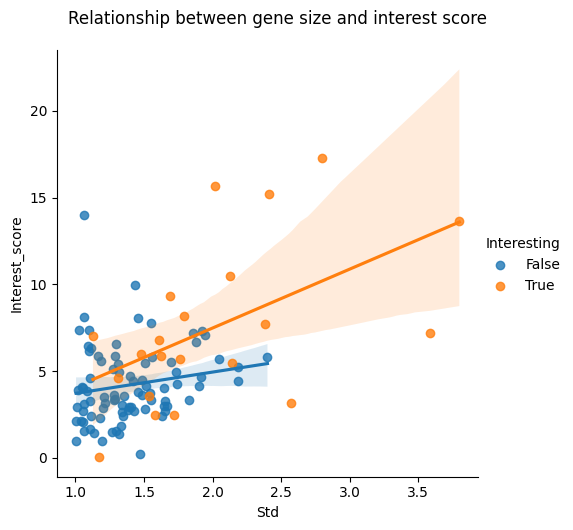

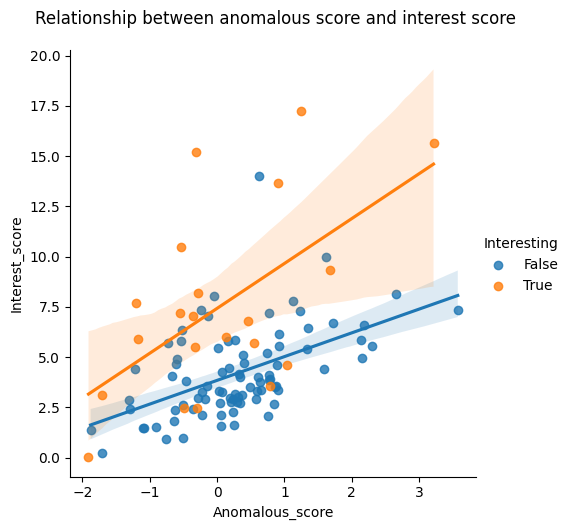

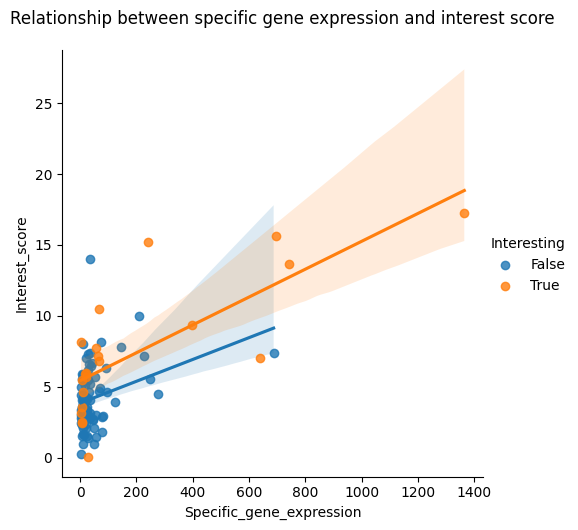

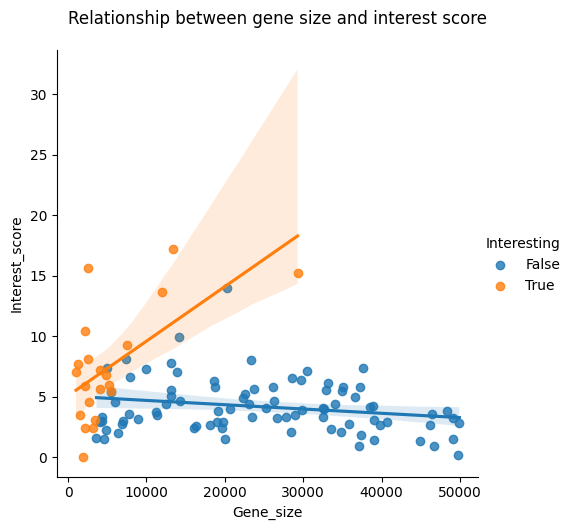

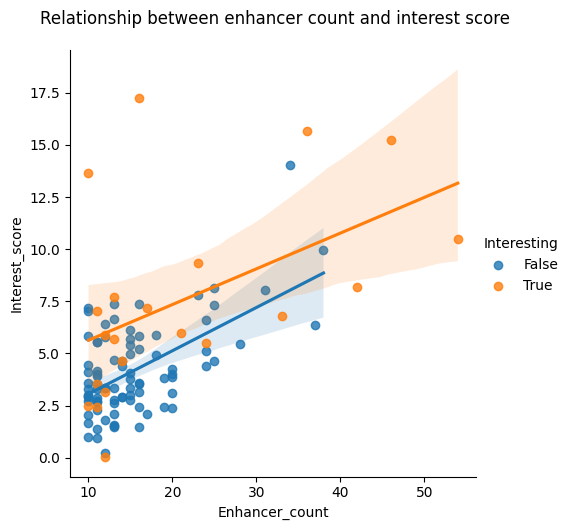

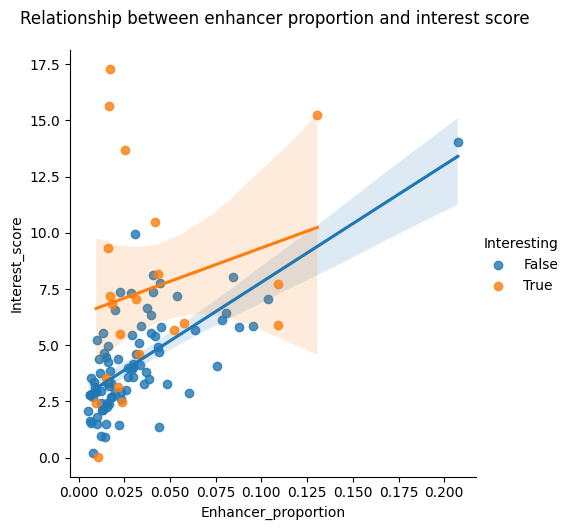

In [35]:
### Graph here showing relplot of metrics versus interest score

df = pd.read_csv('ronnieNonZscore.txt', sep='\t')
df['Interesting'] = df.apply(isInteresting, axis=1)

g = sns.lmplot(
    data=df,
    x="Std",
    y="Interest_score",
    hue='Interesting'
)

g.fig.suptitle("Relationship between gene size and interest score", y=1.05)

g = sns.lmplot(
    data=df,
    x="Anomalous_score",
    y="Interest_score",
    hue='Interesting'
)

g.fig.suptitle("Relationship between anomalous score and interest score", y=1.05)

g = sns.lmplot(
    data=df,
    x="Specific_gene_expression",
    y="Interest_score",
    hue='Interesting'
)

g.fig.suptitle("Relationship between specific gene expression and interest score", y=1.05)

g = sns.lmplot(
    data=df,
    x="Gene_size",
    y="Interest_score",
    hue='Interesting'
)

g.fig.suptitle("Relationship between gene size and interest score", y=1.05)

g = sns.lmplot(
    data=df,
    x="Enhancer_count",
    y="Interest_score",
    hue='Interesting'
)

g.fig.suptitle("Relationship between enhancer count and interest score", y=1.05)

g = sns.lmplot(
    data=df,
    x="Enhancer_proportion",
    y="Interest_score",
    hue='Interesting'
)

g.fig.suptitle("Relationship between enhancer proportion and interest score", y=1.05)

In [ ]:
### Graph showing the displot for interest score, with chromosome as the hue - probably forget this

### What stood out, whilst visualising the distribution of interest scores by chromosome, was the uniquely large spread of chromosome 15.
### In addition, it was also quite interesting to note how the very tops of all chromosomes seemed to form a downward slope.

Text(0.5, 1.05, 'Distribution Of Interest Scores Across Chromosomes')

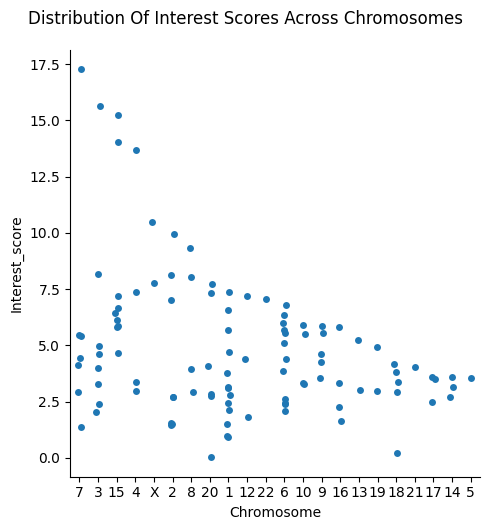

In [38]:
### Graph showing catplot of interest score by chromosome
g = sns.catplot(
    data=df,
    x="Chromosome",
    y="Interest_score",
)

g.fig.suptitle("Distribution Of Interest Scores Across Chromosomes", y=1.05)

### To see this easier, lets remove the outliers

In [ ]:
### Graph here showing catplot of interest score by chromosome, with interest score above 8

### Upon looking at this, Jonas affirmed that this is what we would expect to see, as chromsome 15 does...
### Aside from this, we can see that the chromosomes do indeed have more or less the same distribution

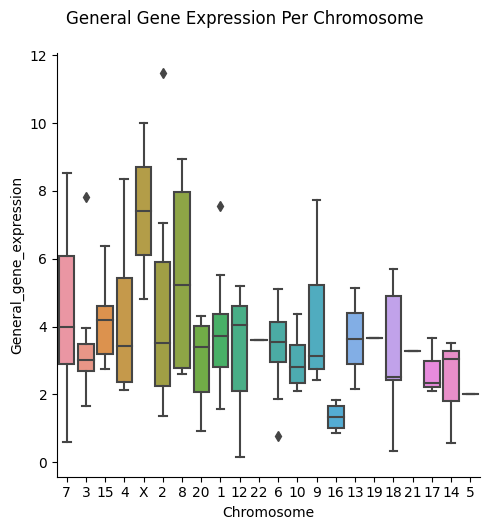

In [42]:
### Graph showing boxplot of interest score by chromosome
g = sns.catplot(
    data=df,
    x="Chromosome",
    y="General_gene_expression",
    kind='box'
)

g.fig.suptitle("General Gene Expression Per Chromosome", y=1.05);

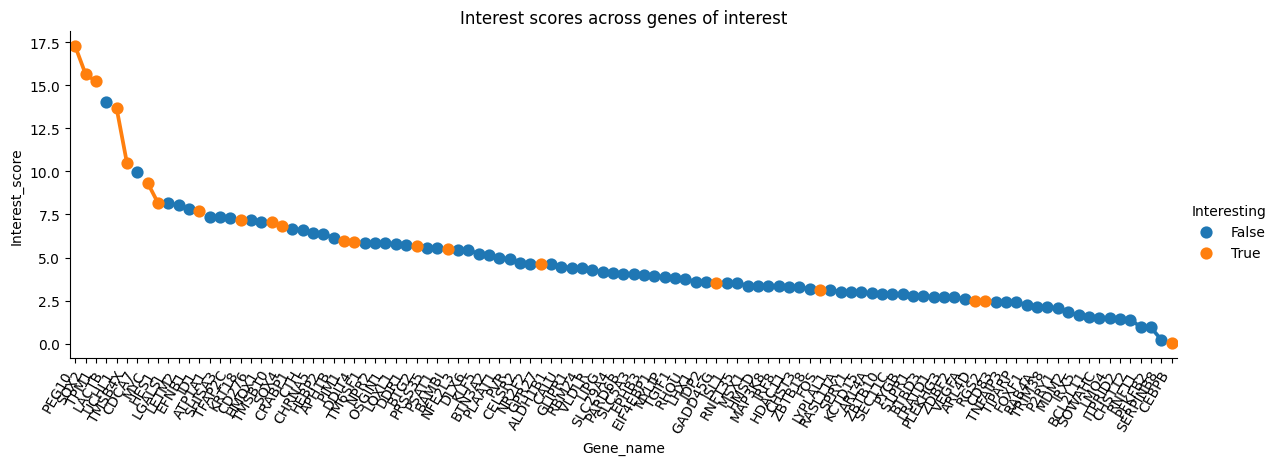

In [46]:
### Add comment here
sns.catplot(
    data = df,
    x = 'Gene_name',
    y = 'Interest_score',
    kind = 'point',
    hue = 'Interesting',
    errorbar=None,
    aspect=3,
    height=4,
    #order=interestingGenes
)

plt.title("Interest scores across genes of interest")
plt.xticks(rotation=60, ha='right');

### Interesting though all of this was, we could not really use it to inform how we should modify our weights in order to produce the distribution of interest scores we were after.
### So, we started by naively executing the program on some perumatations of weights, where each element would be 0.0, 0.1, 0.2 ... 0.9, whilst the rest stayed the same.
### This meant that we could observe the interest scores of specific genes across different sets of weight; how changing certain weights would affect certain genes, in other words.

In [50]:
def returnWeights(row):
    return str(imputeWeights)

def returnWeightLabels(row):
    return str(weightLabels[i])

weightLabels = ['Std', 
                'Anomalous Score', 
                'Gene Expression', 
                'Enhancer Count', 
                'Enhancer Proportion',
                'Gene Size',
                'Threshold']
weightRanges = np.arange(0, 1, 0.1)
weights = [1, 1, 1, 1, 1, 1, 0]
df = pd.DataFrame()


for i in range(len(weights)):
    for j in weightRanges:
        weights[i] = j
        
        try:
            mergedf = pd.read_csv(f'Reports/Report{weights[0]}-{weights[1]}-{weights[2]}-{weights[3]}-{weights[4]}-{weights[5]}-{weights[6]}.txt', sep='\t')
            
            imputeWeights = f'{round(weights[0], 2)}-{round(weights[1], 2)}-{round(weights[2], 2)}-{round(weights[3], 2)}-{round(weights[4], 2)}-{round(weights[5], 2)}-{round(weights[6], 2)}'
            
            mergedf['Weights'] = mergedf.apply(returnWeights, axis=1)
            mergedf['Metric'] = mergedf.apply(returnWeightLabels, axis=1)
            
            df = pd.concat([df, mergedf], ignore_index=True)
            
        except:
            pass 
        
    weights = [1, 1, 1, 1, 1, 1, 0]

df.drop(columns=df.columns[0], axis=1, inplace=True)
interestingGenesDf = df[df['Gene_name'].isin(interestingGenes)]

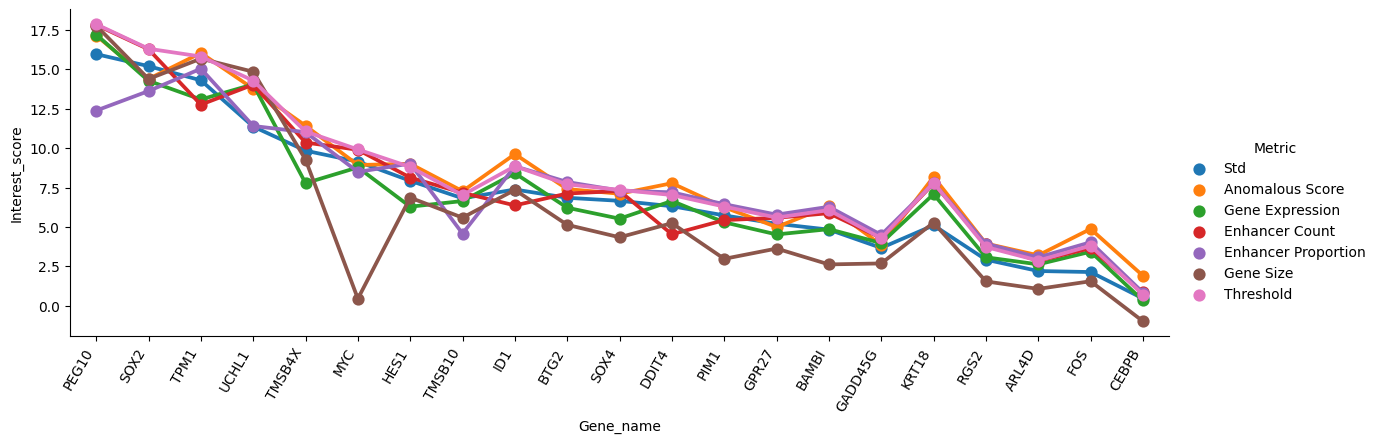

In [53]:
### Graph of catplot of kind point, showing interest score across gene name, with a hue of metric.

sns.catplot(
    data = interestingGenesDf,
    x = 'Gene_name',
    y = 'Interest_score',
    kind = 'point',
    hue = 'Metric',
    errorbar=None,
    aspect=3,
    height=4,
    #order=interestingGenes
)
plt.xticks(rotation=60, ha='right');

### From this we can start to get a sense of what is happening, but perhaps a better way of visualising the data would be with a bar chart.

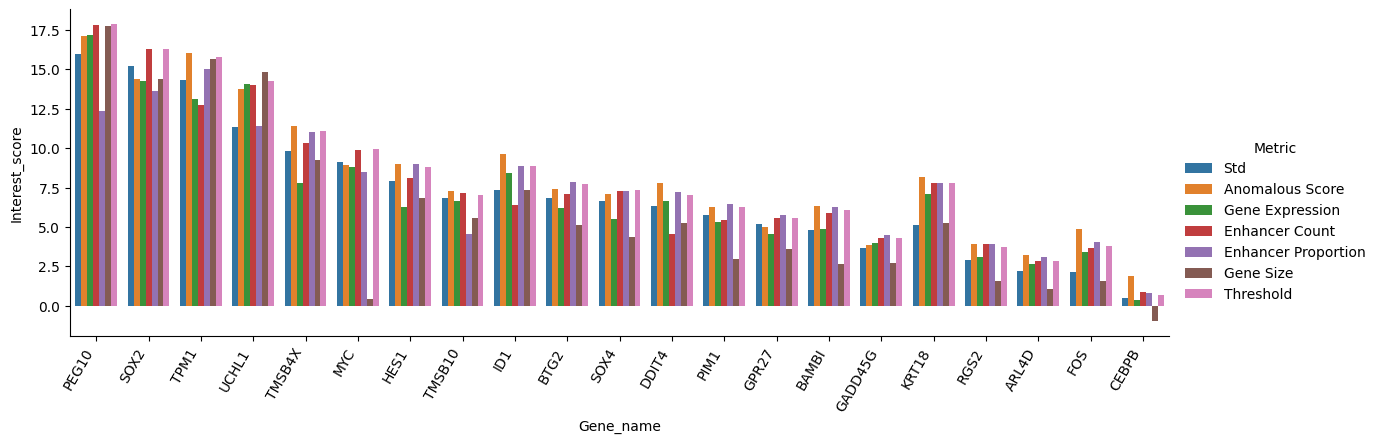

In [54]:
### Graph of catplot of kind bar, showing interest score across gene name, with a hue of metric.

sns.catplot(
    data = interestingGenesDf,
    x = 'Gene_name',
    y = 'Interest_score',
    kind = 'bar',
    hue = 'Metric',
    errorbar=None,
    aspect=3,
    height=4,
    #order=interestingGenes
)
plt.xticks(rotation=60, ha='right');

### What can we tell from the above graph?
#### We can see that in order to raise the interest scores of the bottom 5 genes, we should increase the weight of gene size
#### We can see that, generally speaking, changing any of the weights affects the interest score of the gene by roughly the same amount, 
#### but that gene size is consistently the most impactful
#### Gene size is, for whatever reason, an extremely important metric for gene MYC; it also *negatively* affects the bottom gene, CEBPB

### It seemed perculiar that gene size would so markedly affect certain genes, and so closer inspection revealed that there was a bug in the way that the gene size was being calculated, as illustrated by the graph below.

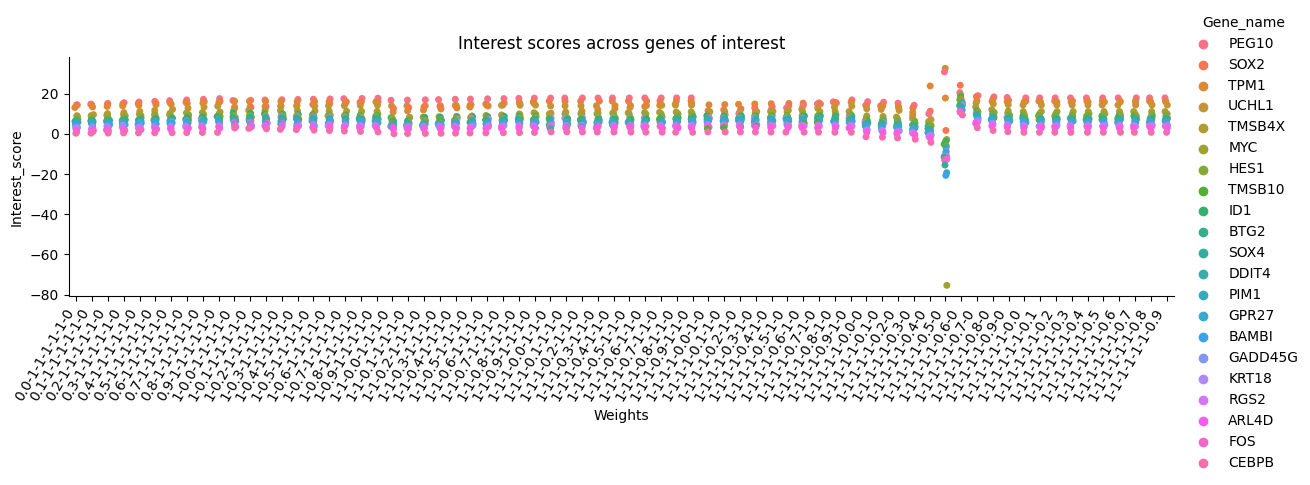

In [55]:
### Graph of catplot of interesting genes, showing interest score across weights, with a hue of gene_name.

sns.catplot(
    data = interestingGenesDf,
    x = 'Weights',
    y = 'Interest_score',
    hue = 'Gene_name',
    aspect=3,
    height=4,
    #order=interestingGenes
)

plt.title("Interest scores across genes of interest")
plt.xticks(rotation=60, ha='right');

In [ ]:
### Graph of catplot of interesting genes, showing interest score across weights, with a hue of metric.

### Consequently, the equation that is used to calculate gene size has been changed, and the results for this are being collated at the moment.
### The expectation is that automating in this way, will illuminate the ideal weights to be used.